In [6]:
from coba.benchmarks import Result
from coba.analysis import Plots
import numpy as np
import pandas as pd

In [21]:
result = Result.from_transaction_file('benchmark_med.log')

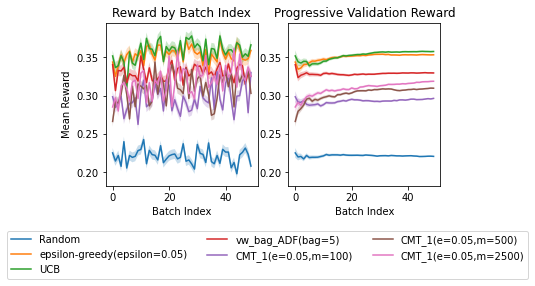

In [22]:
Plots.standard_plot(result, show_err=True)

In [29]:
result

{'Learners': 7, 'Simulations': 18, 'Batches': 6276}

In [23]:
l,s,b = result.to_pandas()

In [28]:
b[b.simulation_id !=105].groupby('learner_id').mean().join(l).sort_values('reward')

,simulation_id,batch_index,N,reward,learner_id,family,full_name,epsilon,bag,e,m
learner_id,,,,,,,,,,,
0,37.941176,24.5,200.0,0.227824,0,Random,Random,NaN,NaN,NaN,NaN
4,37.941176,24.5,200.0,0.307971,4,CMT_1,"CMT_1(e=0.05,m=100)",NaN,NaN,0.05,100.0
5,37.941176,24.5,200.0,0.321353,5,CMT_1,"CMT_1(e=0.05,m=500)",NaN,NaN,0.05,500.0
6,37.941176,24.5,200.0,0.323324,6,CMT_1,"CMT_1(e=0.05,m=2500)",NaN,NaN,0.05,2500.0
3,37.941176,24.5,200.0,0.343394,3,vw_bag_ADF,vw_bag_ADF(bag=5),NaN,5.0,NaN,NaN
1,37.941176,24.5,200.0,0.367712,1,epsilon-greedy,epsilon-greedy(epsilon=0.05),0.05,NaN,NaN,NaN
2,37.941176,24.5,200.0,0.372771,2,UCB,UCB,NaN,NaN,NaN,NaN


In [14]:
pd.merge(l,b[b.batch_index == 49].groupby('learner_id').mean(), on='learner_id').sort_values('reward')

,learner_id,family,full_name,epsilon,bag,e,m,simulation_id,batch_index,N,reward
0,0,Random,Random,NaN,NaN,NaN,NaN,41.666667,49.0,200.0,0.208056
5,5,CMT_1,"CMT_1(e=0.05,m=500)",NaN,NaN,0.05,500.0,41.666667,49.0,200.0,0.303056
3,3,vw_bag_ADF,vw_bag_ADF(bag=5),NaN,5.0,NaN,NaN,41.666667,49.0,200.0,0.325278
6,6,CMT_1,"CMT_1(e=0.05,m=2500)",NaN,NaN,0.05,2500.0,37.941176,49.0,200.0,0.325294
4,4,CMT_1,"CMT_1(e=0.05,m=100)",NaN,NaN,0.05,100.0,41.666667,49.0,200.0,0.330278
1,1,epsilon-greedy,epsilon-greedy(epsilon=0.05),0.05,NaN,NaN,NaN,41.666667,49.0,200.0,0.359167
2,2,UCB,UCB,NaN,NaN,NaN,NaN,41.666667,49.0,200.0,0.366389


<AxesSubplot:ylabel='Frequency'>

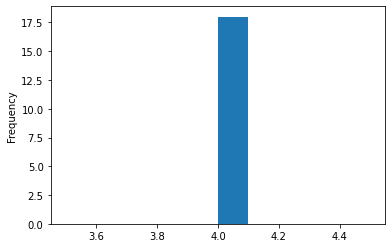

In [18]:
np.log10(s['interaction_count']).plot(kind="hist")

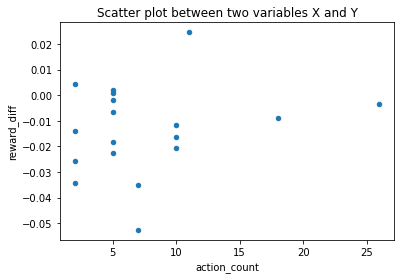

In [20]:
bb = b.copy()
ss = s.copy()

bb.simulation_id = bb.simulation_id.astype('int')
ss.simulation_id = ss.simulation_id.astype('int')

bb['mod_sim_id'] = bb.simulation_id % 497
ss['mod_sim_id'] = ss.simulation_id % 497

bb = bb.groupby(['learner_id','mod_sim_id'], as_index=False).mean()

a = pd.merge(bb[bb.learner_id == 4],ss, on='mod_sim_id')
c = pd.merge(bb[bb.learner_id == 5],ss, on='mod_sim_id')

a.reward = a.reward.astype('float')
c.reward = c.reward.astype('float')

a['reward_diff']             = a.reward - c.reward
a['interaction_count_log10'] = np.log10(a.interaction_count)

a.plot.scatter(x='action_count', y='reward_diff', title= "Scatter plot between two variables X and Y");

In [22]:
result

{'Learners': 6, 'Simulations': 45, 'Batches': 13430}

In [24]:
(1/s.action_count).mean()

0.2205911372578039